# Collect Data


In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
print(pd.__version__)

1.3.4


In [3]:

#df = pd.read_csv('/content/drive/Shareddrives/real/Big Data/data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

# for jupyter 
# df = pd.read_csv('data/big-data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

df = pd.read_csv('data/CSV/vn_news_223_tdlfr.csv')
df.head()

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1


In [4]:
# clean domain names, since there are things like http://zing.news.vn/ and zing.news.vn which are the same thing
for i in range(len(df['domain'])):
    df.at[i, 'domain'] = re.sub(r'www.|/|https:|http:', '', df['domain'][i])

In [5]:
# check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    223 non-null    object
 1   domain  223 non-null    object
 2   label   223 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB
None


# Visualization

In [6]:
#!pip install plotly
#!pip install cufflinks

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# run this again if iplot doesn't display
# plotly packages
import plotly
#import iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

Tổng số lượng nhãn: 223 

label
0    123
1    100
dtype: int64 



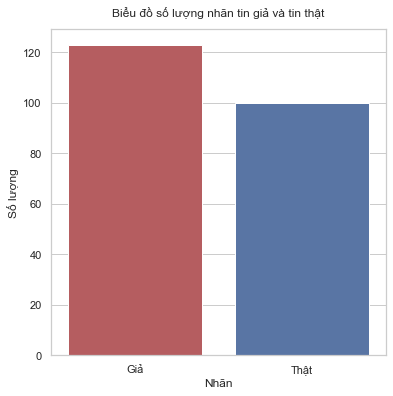

In [8]:
# Count of each label
label_count = df.value_counts('label')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x=['Giả', 'Thật'], y=label_count, palette=['r', 'b'])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng nhãn tin giả và tin thật', y=1.02) # y = space from graph
print('Tổng số lượng nhãn:', len(df['label']), '\n')
print(label_count, '\n')

Tổng số lượng các tên miền: 29 

domain
vnexpress.net              73
tinvn.info                 68
dantri.com.vn              14
thethao.tuoitre.vn         10
news.zing.vn                7
thoibao.today               6
tuoitre.vn                  5
tintucqpvn.net              5
thanhnien.vn                5
kinhdoanh.vnexpress.net     3
phapluat.news               3
doisong.vnexpress.net       2
thegioitre.vn               2
giadinhtiepthi.com          2
giaitri.vnexpress.net       2
ipick.vn                    2
thoibao.de                  2
vietgiaitri.com             1
baonuocmy.com               1
binhluan.biz                1
sorry.vn                    1
suckhoe.vnexpress.net       1
dulich.vnexpress.net        1
sohoa.vnexpress.net         1
baoangiang.com.vn           1
laodong.vn                  1
haiduong.tintuc.vn          1
gioitreviet.net             1
autoxe.net                  1
dtype: int64 



"domain_count.iplot(\n    kind='barh',\n    xTitle='Số từ',\n    yTitle='Số tin tức',\n    linecolor='black',\n    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',\n    color='red')"

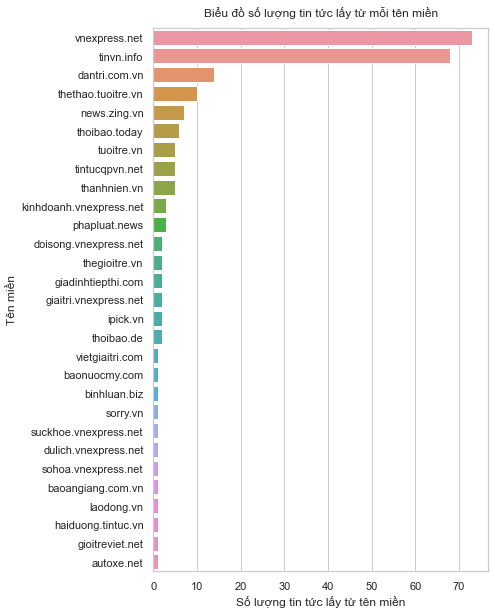

In [9]:
# Count of each domain names
domain_count = df.value_counts('domain')

plt.figure(figsize=(6, 10))
sns.barplot(x=domain_count, y=domain_count.index)
plt.xlabel('Số lượng tin tức lấy từ tên miền')
plt.ylabel('Tên miền')
plt.title('Biểu đồ số lượng tin tức lấy từ mỗi tên miền', y=1.01) # y = space from graph

print('Tổng số lượng các tên miền:', len(set(df['domain'])), '\n')
print(domain_count, '\n')

'''domain_count.iplot(
    kind='barh',
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',
    color='red')'''

In [10]:
'''df['len_text'].iplot(
    kind='hist',
    bins=50,
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng từ trong một tin tức',
    )'''

"df['len_text'].iplot(\n    kind='hist',\n    bins=50,\n    xTitle='Số từ',\n    yTitle='Số tin tức',\n    linecolor='black',\n    title='Biểu đồ số lượng từ trong một tin tức',\n    )"

In [11]:
df

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",gioitreviet.net,1
...,...,...,...
218,“Siêu máy bay” A350 sẽ chở CĐV Việt Nam đi Mal...,dantri.com.vn,0
219,Thưởng 20.000 USD cho đội tuyển cờ vua Việt Na...,dantri.com.vn,0
220,Trường Sơn giành HCV tại giải cờ vua đồng đội ...,dantri.com.vn,0
221,Chuyện về chàng sinh viên Luật - Kiện tướng Lê...,dantri.com.vn,0


Text(0.5, 1.0, 'Biểu đồ số lượng từ trong tin thật và giả')

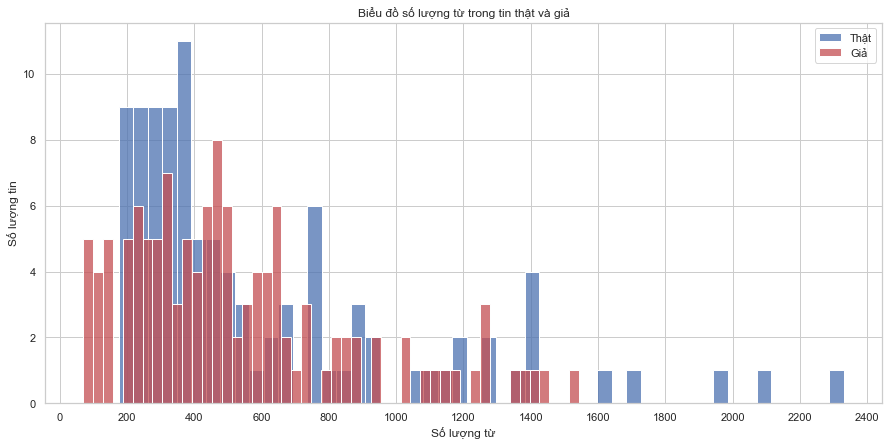

In [12]:
# for graphing
len_true = [len(n.split()) for n in df[df['label'] == 1]['text']]
len_fake = [len(n.split()) for n in df[df['label'] == 0]['text']]

# Number of words distribution in fake and true news
plt.figure(figsize=(15, 7))
sns.histplot(data=len_true, bins=50, color='b')
sns.histplot(data=len_fake, bins=50, color='r')
plt.xticks(ticks=range(0, 2500, 200))
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng từ trong tin thật và giả')

# Tokenize and clean

In [13]:
# idea: top các bài báo có số lượng từ nhiều nhất thuộc về các domain nào
# how many distinct words in fake and true
# longest and shortest news 
# 
# word cloud (done)

In [14]:
from pyvi import ViTokenizer

In [15]:
from underthesea import word_tokenize
import itertools
import string

In [16]:
# get stopwords list
f = open('data/vietnamese-stopwords-dash.txt', 'r', encoding="utf8")
stopwords = f.read().split('\n')

In [17]:
print(stopwords[:50])

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_nả', 'bay_biến', 'biết', 'biết_bao', 'biết_bao_nhiêu', 'biết_chắc', 'biết_chừng_nào', 'biết_mình', 'biết_mấy', 'biết_thế', 'biết_trước', 'biết_việc', 'biết_đâu', 'biết_đâu_chừng', 'biết_đâu_đấy', 'biết_được', 'buổi', 'buổi_làm', 'buổi_mới', 'buổi_ngày', 'buổi_sớm', 'bà', 'bà_ấy', 'bài', 'bài_bác', 'bài_bỏ', 'bài_cái', 'bác', 'bán']


In [18]:
# remove stopwords in news text
def clean_stopwords(sent_list):
    ''' sent_list: already tokenized sentence in list format
    '''
    clean_sent = []
    for word in sent_list:
        if word not in stopwords:
            clean_sent.append(word.lower())
    return clean_sent

In [19]:
def normalize(sent):
  sent = re.sub(r'[^\w\s]', '', sent) # clean normal punctuation
  sent = re.sub(r'_', '', sent) # clean weird underscore in text (_like this)
  sent = re.sub(r'http\w+', '', sent) # clean url link text
  sent = word_tokenize(sent.lower(), format='text').split() #tokenize, word segment
  return clean_stopwords(sent)

In [20]:
sent = 'Thủ tướng Abe9, cúi httpnfdmsndm,%%file đầu xin lỗi vì: hành, động phi _thể thao'
normalize(sent)

['thủ_tướng', 'abe9', 'cúi', 'đầu', 'xin_lỗi', 'hành_động', 'phi', 'thể_thao']

In [21]:
# tokenize with word segment and clean punctuation
#def tokenize(sent):
 #   return re.findall(r'[_\w]+', word_tokenize(sent, format='text'))
  
# tokenize, word segment and clean punctuation from a sentence
#def tokenize(sent):
 #   regex = re.compile('[%s]' % re.escape(string.punctuation))
  #  return word_tokenize(regex.sub('', sent.lower()), format='list')

In [22]:
# tokenize, clean stopwords and separate fake and true news
true_news = [normalize(n) for n in df[df['label'] == 1]['text']]
fake_news = [normalize(n) for n in df[df['label'] == 0]['text']]
#df['len_text_clean'] = [len(n) for n in clean_news]

Text(0.5, 1.0, 'Biểu đồ số lượng từ sau khi xử lý trong tin thật và giả')

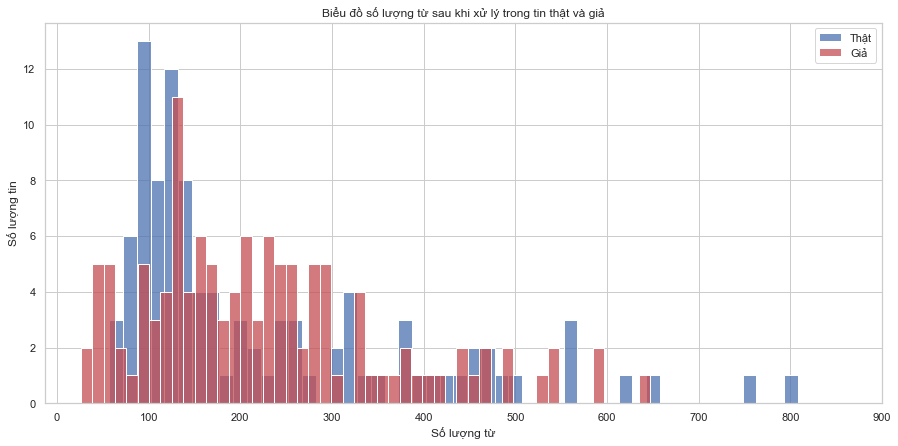

In [23]:
# for graphing
len_true_clean = [len(n) for n in true_news]
len_fake_clean = [len(n) for n in fake_news]

# Number of words distribution in fake and true news
plt.figure(figsize=(15, 7))
sns.histplot(data=len_true_clean, bins=50, color='b')
sns.histplot(data=len_fake_clean, bins=50, color='r')
plt.xticks(ticks=range(0, 1000, 100))
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng từ sau khi xử lý trong tin thật và giả')

# Word Cloud

In [24]:
from wordcloud import WordCloud, ImageColorGenerator

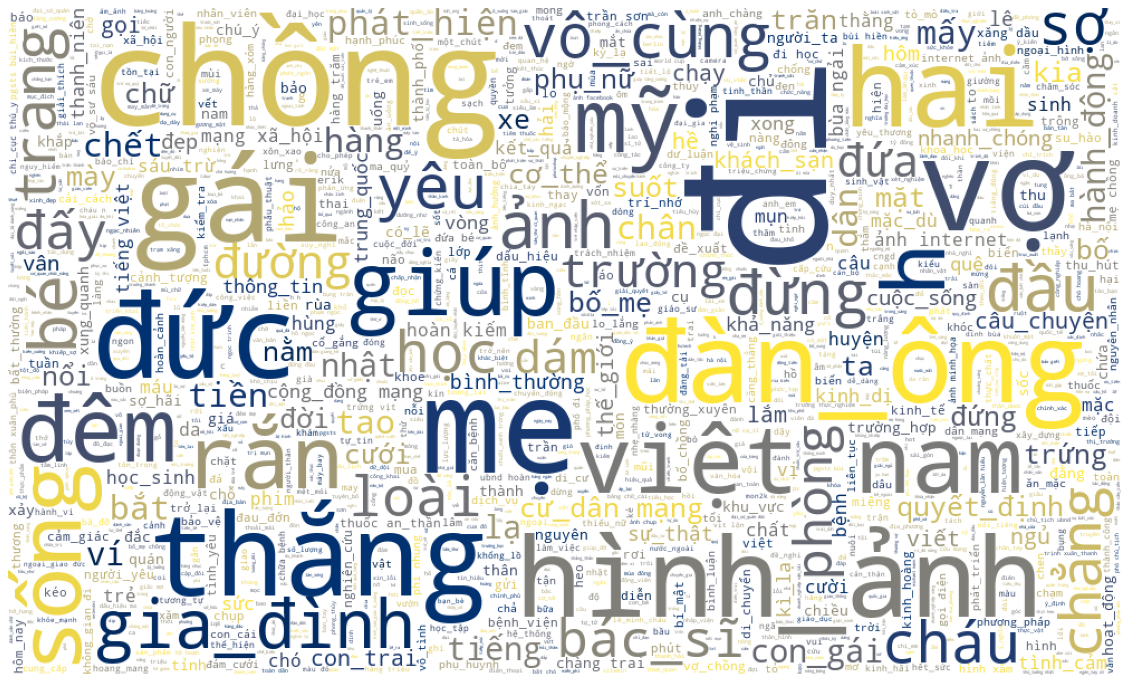

In [25]:
# True news
true_news_flatten = list(itertools.chain(*true_news))
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='white', colormap='cividis_r', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(true_news_flatten))
plt.axis("off")
plt.imshow(wc)

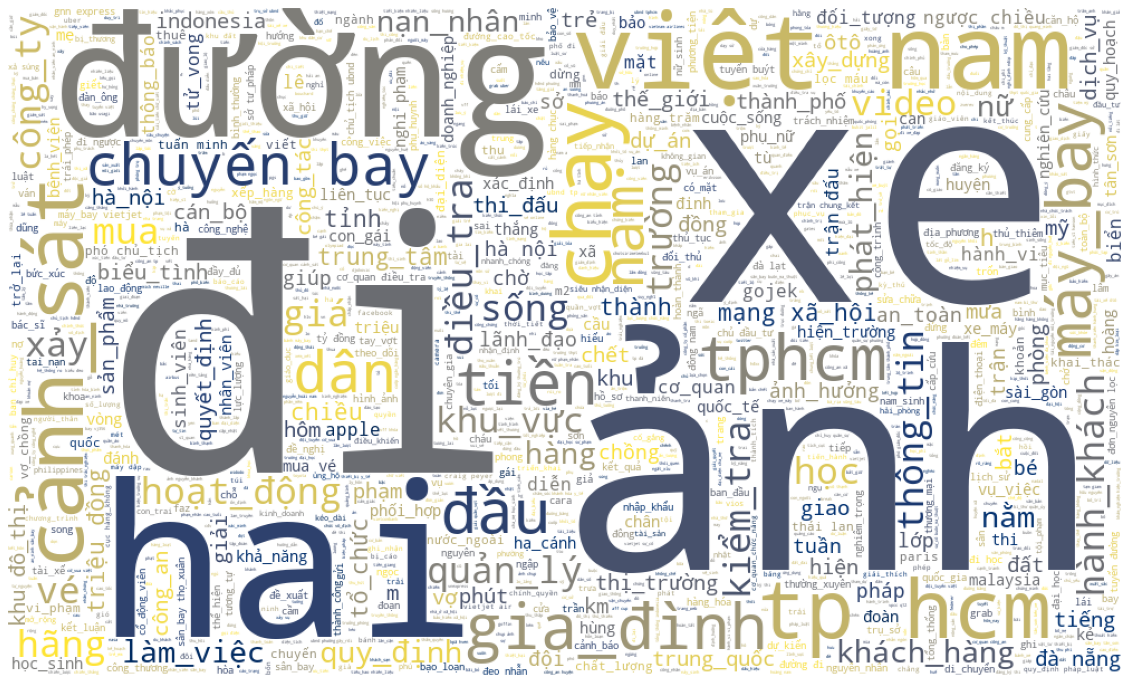

In [26]:
# Fake news
fake_news_flatten = list(itertools.chain(*fake_news))
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='white', colormap='cividis', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(fake_news_flatten))
plt.axis("off")
plt.imshow(wc)

In [27]:
from collections import Counter

counter_true = Counter()
counter_true.update(true_news_flatten)

counter_fake = Counter()
counter_fake.update(fake_news_flatten)

Text(0.5, 1.0, 'Các từ xuất hiện nhiều nhất trong tin thật')

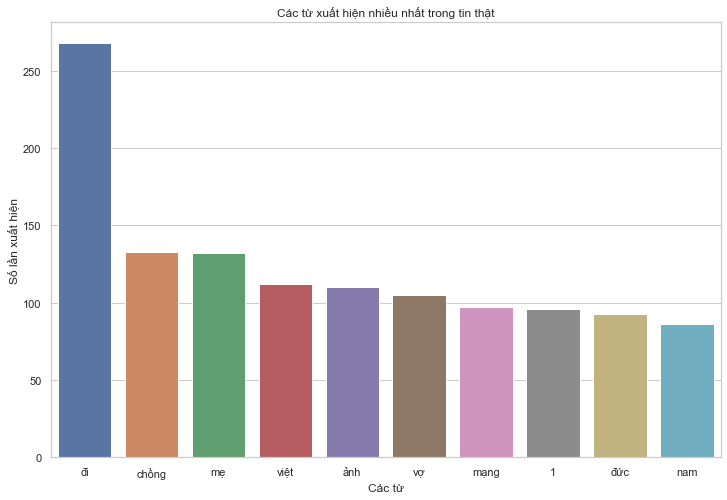

In [28]:
# for graphing, top ten words commonly used in true news
key = [word[0] for word in counter_true.most_common(10)]
value = [word[1] for word in counter_true.most_common(10)]

plt.figure(figsize=(12, 8))
sns.barplot(x=key, y=value)
plt.xlabel('Các từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Các từ xuất hiện nhiều nhất trong tin thật')

Text(0.5, 1.0, 'Các từ xuất hiện nhiều nhất trong tin thật')

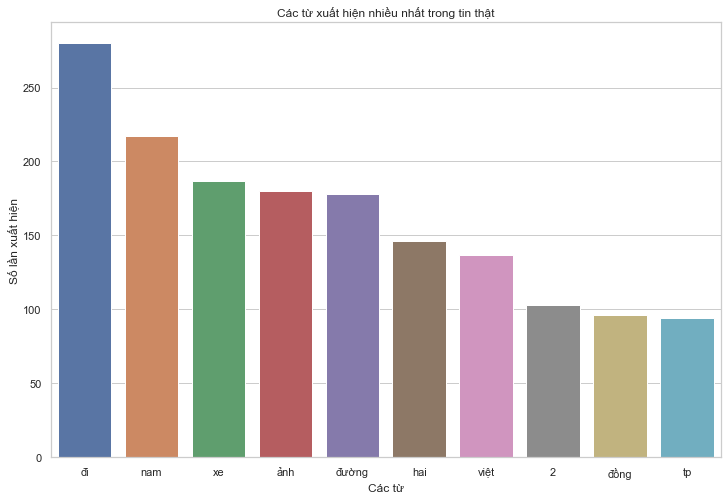

In [29]:
# for graphing, top ten words commonly used in true news
key = [word[0] for word in counter_fake.most_common(10)]
value = [word[1] for word in counter_fake.most_common(10)]

plt.figure(figsize=(12, 8))
sns.barplot(x=key, y=value)
plt.xlabel('Các từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Các từ xuất hiện nhiều nhất trong tin thật')

# Pre-processing

In [30]:
'''
1. clean domain names (done)
2. classify domain names to categorical type? labelencoder or sth else
3. xử lý text
    check missing or too trash (done)
    clean, filer (regex) on some part if needed (done)
    tokenize(done), word segment(done), remove stopwords?(done), remove numerical tokens?, group same tokens? -> check again if too short text data remains-> remove from data?
    word embedding: tfidf?, word2vec...?
'''

'\n1. clean domain names (done)\n2. classify domain names to categorical type? labelencoder or sth else\n3. xử lý text\n    check missing or too trash (done)\n    clean, filer (regex) on some part if needed (done)\n    tokenize(done), word segment(done), remove stopwords?(done), remove numerical tokens?, group same tokens? -> check again if too short text data remains-> remove from data?\n    word embedding: tfidf?, word2vec...?\n'

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(preprocessor=' '.join)
X = vectorizer.fit_transform(true_news + fake_news)

In [32]:
print('Số lượng các từ khác nhau:', len(vectorizer.vocabulary_))
vectorizer.vocabulary_ # distinct words list and its ID

Số lượng các từ khác nhau: 8507


{'thủ_tướng': 6318,
 'abe': 405,
 'cúi': 1651,
 'đầu': 8200,
 'xin_lỗi': 7626,
 'hành_động': 2748,
 'phi': 4972,
 'thể_thao': 6256,
 'tuyển': 6814,
 'nhật': 4680,
 'sankei': 5527,
 'sports': 5618,
 'shinzo': 5563,
 'công_khai': 1613,
 'gửi': 2520,
 'hoàng': 2659,
 'toàn_bộ': 6485,
 'dân': 2011,
 'tinh_thần': 6379,
 'thi_đấu': 5928,
 'đội_tuyển': 8383,
 'world': 7590,
 'cup': 1512,
 '2018': 164,
 'tối_qua': 7128,
 'lượt': 3703,
 'trận': 6718,
 'vòng': 7381,
 'bảng': 804,
 'chỉ_số': 1349,
 'phụ': 5158,
 'senegal': 5550,
 'đội': 8377,
 'thua': 5989,
 'colombia': 1465,
 'fairplay': 2185,
 'thẻ': 6233,
 'phạt': 5117,
 'võ_sĩ_đạo': 7411,
 'samurai': 5520,
 'thượng_võ': 6157,
 'chỉ_trích': 1351,
 'bất_bình': 822,
 'toàn': 6484,
 'hình_ảnh': 2787,
 'kiên_cường': 3277,
 'đấu_trường': 8195,
 'quốc_tế': 5356,
 'đứng': 8418,
 'thành': 6019,
 'trách_nhiệm': 6606,
 'gửi_lời': 2522,
 'sâu_sắc': 5693,
 'nhân_dân': 4610,
 'nổi_tiếng': 4869,
 'chất': 1292,
 'áo': 7834,
 'xanh': 7602,
 'mệnh_danh': 4133,

In [33]:
vectorizer.get_feature_names() # -> clean numbers?

['001',
 '01',
 '012018',
 '03',
 '0412',
 '05',
 '08',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '101',
 '1010',
 '1012',
 '10151',
 '102017',
 '1024',
 '105',
 '109',
 '11',
 '110',
 '1100',
 '11000',
 '1110',
 '11102013',
 '1112',
 '1112017',
 '111997',
 '112',
 '112017',
 '112018',
 '113',
 '115',
 '116',
 '119',
 '1192017',
 '12',
 '12000',
 '1200000',
 '121',
 '122013',
 '1234',
 '1242015',
 '125',
 '13',
 '13000',
 '1310',
 '132017',
 '133',
 '1347',
 '1352018',
 '136000',
 '1374',
 '138',
 '1380',
 '139',
 '14',
 '140',
 '1400',
 '14102011',
 '142',
 '144',
 '1442016',
 '1472018',
 '148',
 '15',
 '150',
 '15000',
 '1511',
 '15112013',
 '15112018',
 '152',
 '1522019',
 '1559',
 '156',
 '159',
 '16',
 '160',
 '162',
 '164',
 '165',
 '166',
 '168',
 '168000',
 '17',
 '170',
 '1710',
 '1712017',
 '172017',
 '174',
 '175',
 '176',
 '17934',
 '18',
 '180',
 '180000',
 '180197',
 '181',
 '1810',
 '1828',
 '184387',
 '185',
 '1852013',
 '186',
 '189',
 '1895',
 '19',
 '1900',
 '191

In [34]:
y = np.array([1]*len(true_news) + [0]*len(fake_news))

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

In [37]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
y_pred_tree = tree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_pred_tree, y_test))
print(accuracy_score(y_pred_tree, y_test))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.50      0.64      0.56        14

    accuracy                           0.69        45
   macro avg       0.66      0.68      0.66        45
weighted avg       0.72      0.69      0.70        45

0.6888888888888889


In [64]:
from sklearn.linear_model import LogisticRegression
clf_lore = LogisticRegression(random_state=0)
clf_lore.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
y_pred_lore = clf_lore.predict(X_test)

In [66]:
print(classification_report(y_pred_lore, y_test))
print(accuracy_score(y_pred_lore, y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.72      0.93      0.81        14

    accuracy                           0.87        45
   macro avg       0.84      0.88      0.85        45
weighted avg       0.89      0.87      0.87        45

0.8666666666666667


In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred_neigh = neigh.predict(X_test)

In [47]:
print(classification_report(y_pred_neigh, y_test))
print(accuracy_score(y_pred_neigh, y_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.94      0.81      0.87        21

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.90      0.89      0.89        45

0.8888888888888888


In [48]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [49]:
y_pred_nb = nb.predict(X_test)

In [50]:
print(classification_report(y_pred_nb, y_test))
print(accuracy_score(y_pred_nb, y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45

0.8888888888888888


In [111]:
from sklearn import svm
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [112]:
y_pred_svc = clf_svc.predict(X_test)

In [113]:
print(classification_report(y_pred_svc, y_test))
print(accuracy_score(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.86      0.92        21

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


# Evaluation

# Detection

In [ ]:
# not done
def detect(text, model):
  text = normalize(text)
  text = vectorizer.transform(text)
  print(text)
  pred = tree.predict(text)
  return pred

# Different Approach

In [ ]:
# different feature extraction